## Problem Statement 

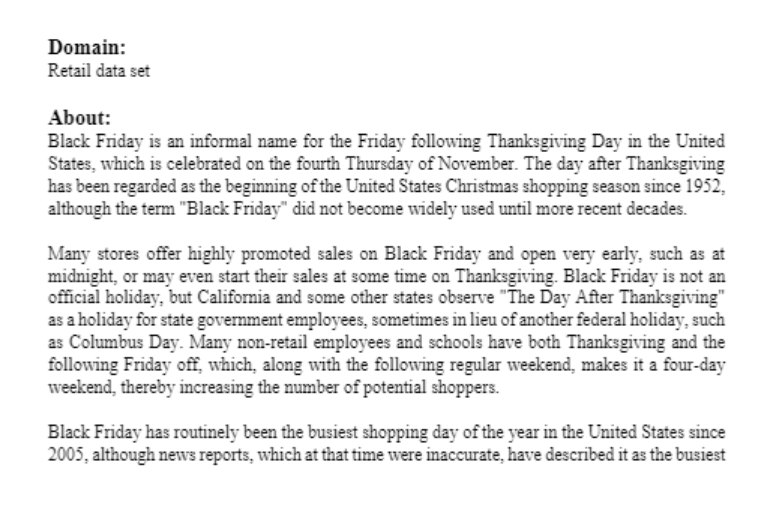

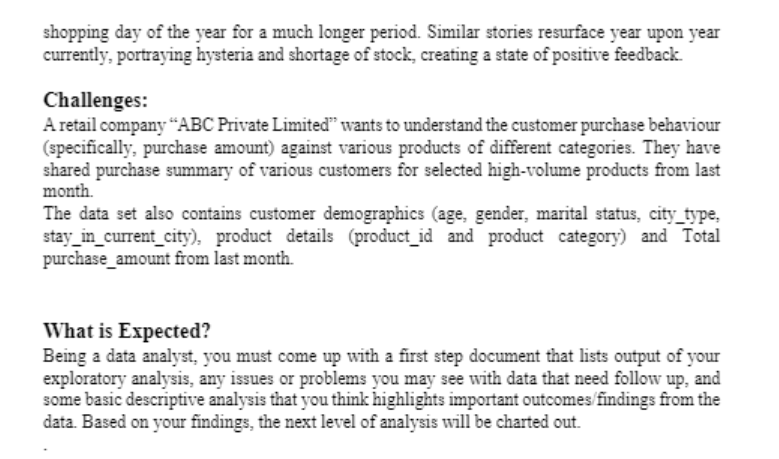

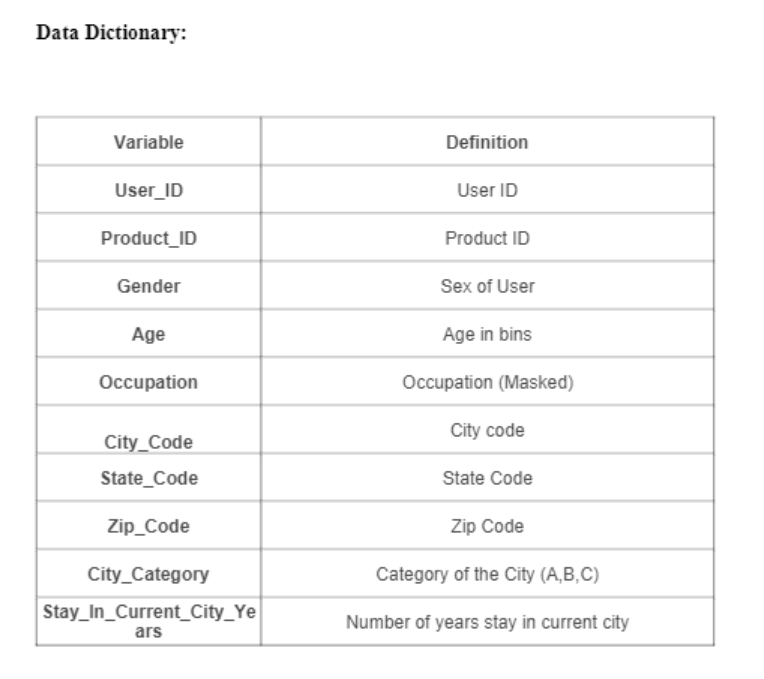

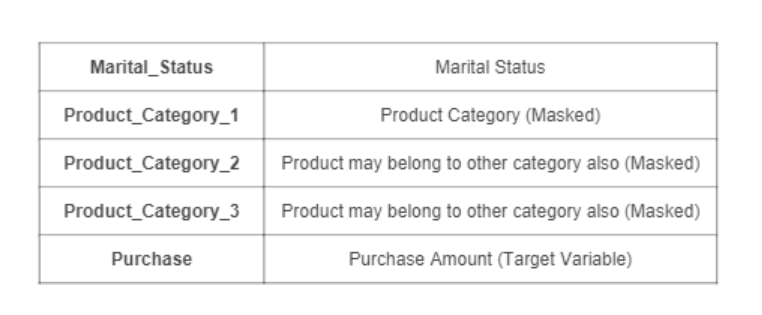

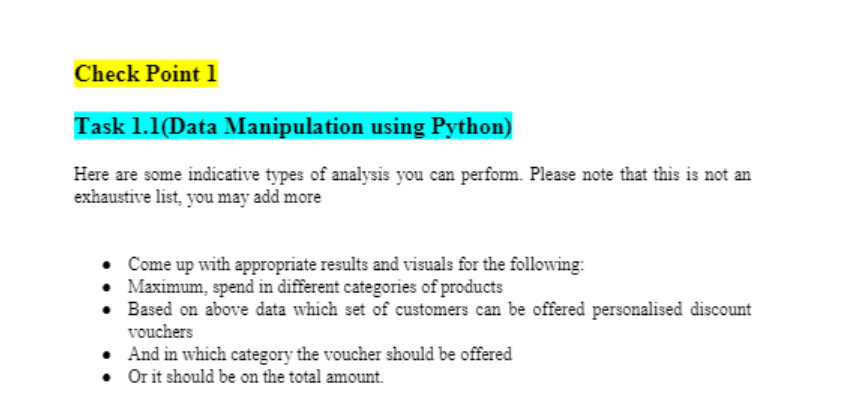

## Reading the Datasets

In [1]:
import pandas as pd


In [3]:
v = pd.read_csv("creditcard.csv")

PermissionError: [Errno 13] Permission denied: 'creditcard.csv'

In [4]:
Citymaster = pd.read_excel(r"C:\Users\Hitesharma.US\Untitled Folder 1\Project_2_Retail_dataset- V2 04-07-2022\City_master.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Hitesharma.US\\Untitled Folder 1\\Project_2_Retail_dataset- V2 04-07-2022\\City_master.xlsx'

In [3]:
City_zipcode= pd.read_excel(r"C:\Users\Hitesharma.US\Untitled Folder 1\Project_2_Retail_dataset- V2 04-07-2022\City-zipcodes mapping.xlsx ")

In [4]:
State_master= pd.read_excel(r"C:\Users\Hitesharma.US\Untitled Folder 1\Project_2_Retail_dataset- V2 04-07-2022\State_Master.xlsx ")

In [5]:
user_demographics= pd.read_csv(r"C:\Users\Hitesharma.US\Untitled Folder 1\Project_2_Retail_dataset- V2 04-07-2022\user_demographics.csv")

In [6]:
User_product_purchase_details= pd.read_csv(r"C:\Users\hnankani\Downloads\dataset\User_product_purchase_details_p2.csv ")

In [7]:
inner_merged = pd.merge(City_master, City_zipcode)

In [8]:
inner_merged1= pd.merge(State_master,user_demographics)

In [9]:
inner_merged1.head()

In [10]:
inner_merged1.drop(["State_Code.1"], axis = 1, inplace = True)

In [11]:
inner_merged1.head()

In [13]:
User_product_purchase_details.head()

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,C,4+,0,8,NaN,NaN,7969


In [14]:
#most_frequent_category=User_product_purchase_details["Product_Category_3"].mode()

In [15]:
#most_frequent_category

## Checking and Removing the Outliers

C:\Users\hnankani\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1'>

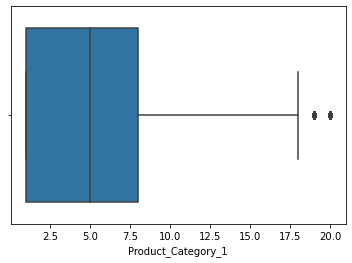

In [16]:
import seaborn as sns
sns.boxplot(User_product_purchase_details['Product_Category_1'])

In [17]:
import numpy as np
Q1 = np.percentile(User_product_purchase_details['Product_Category_1'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(User_product_purchase_details['Product_Category_1'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", User_product_purchase_details.shape)
 
# Upper bound
upper = np.where(User_product_purchase_details['Product_Category_1'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(User_product_purchase_details['Product_Category_1'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
User_product_purchase_details.drop(upper[0], inplace = True)
User_product_purchase_details.drop(lower[0], inplace = True)
 
print("New Shape: ", User_product_purchase_details.shape)

Old Shape:  (550068, 9)
New Shape:  (545915, 9)


C:\Users\hnankani\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1'>

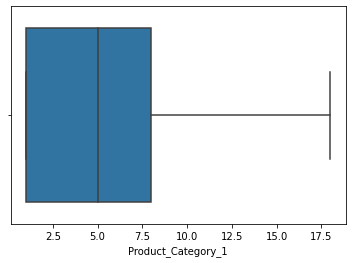

In [18]:
sns.boxplot(User_product_purchase_details['Product_Category_1'])

In [19]:
join = pd.merge(inner_merged,inner_merged1)

In [20]:
retail= User_product_purchase_details

In [21]:
retail.head()

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,C,4+,0,8,NaN,NaN,7969


In [22]:

import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
retail["Purchase"].max()

23961

In [26]:
retail['Product_Category_1'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [27]:
retail['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [28]:
retail['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

## Count Plot for Product Category

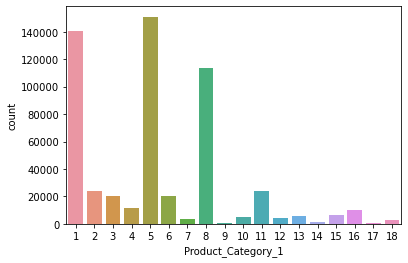

In [30]:
sns.countplot(x ='Product_Category_1', data = retail)
plt.show()

In [31]:
a=(retail.groupby('Product_Category_1')).count()


In [32]:
type(a)

pandas.core.frame.DataFrame

In [33]:
b=a.sort_values(by="Purchase", ascending = False)

In [35]:
len(retail["User_ID"].unique())

5891

In [52]:

a = retail.groupby(['Product_Category_1'])
a.head()

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...
2658,1000424,P00285242,A,3,0,17,NaN,NaN,10549
2871,1000461,P00311342,B,0,0,17,NaN,NaN,10393
7995,1001243,P00184242,B,4+,1,9,15.0,NaN,9282
8951,1001369,P00184242,B,1,1,9,15.0,NaN,13809


In [79]:
a = retail[['Product_Category_1','Purchase']]
a = a.groupby(['Product_Category_1'])['Purchase'].sum()
c = a.sort_values(ascending=False)
c

Product_Category_1
1     1910013754
5      941835229
8      854318799
6      324150302
2      268516186
3      204084713
16     145120612
11     113791115
10     100837301
15      92969042
7       60896731
4       27380488
14      20014696
18       9290201
9        6370324
17       5878699
12       5331844
13       4008601
Name: Purchase, dtype: int64

## Maximum Spend on different Category of Products

In [81]:
a = pd.DataFrame(c)
print(a)
type(a)

                      Purchase
Product_Category_1            
1                   1910013754
5                    941835229
8                    854318799
6                    324150302
2                    268516186
3                    204084713
16                   145120612
11                   113791115
10                   100837301
15                    92969042
7                     60896731
4                     27380488
14                    20014696
18                     9290201
9                      6370324
17                     5878699
12                     5331844
13                     4008601


pandas.core.frame.DataFrame

## Product_Category_1 where Voucher should be Offered

<AxesSubplot:xlabel='Product_Category_1'>

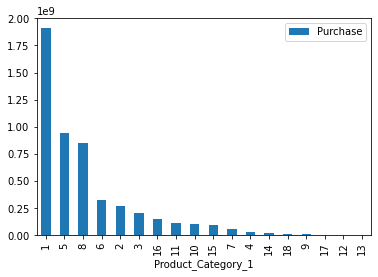

In [82]:
a.plot.bar()

Under Product Category 1     1st has highest Purchase

## Customer to be offered personalised discount Vouchers

In [91]:
b = retail[['User_ID','Purchase']]
b = b.groupby(['User_ID'])['Purchase'].sum()
d = b.sort_values(ascending=False)
d

User_ID
1004277    10536783
1001680     8699232
1002909     7577505
1001941     6817493
1000424     6573609
             ...   
1004991       52371
1005117       49668
1000094       49288
1003883       49104
1004464       46091
Name: Purchase, Length: 5891, dtype: int64

In [85]:
b = pd.DataFrame(d)
print(b)
type(b)

         Purchase
User_ID          
1004277  10536783
1001680   8699232
1002909   7577505
1001941   6817493
1000424   6573609
...           ...
1004991     52371
1005117     49668
1000094     49288
1003883     49104
1004464     46091

[5891 rows x 1 columns]


pandas.core.frame.DataFrame

<AxesSubplot:xlabel='User_ID'>

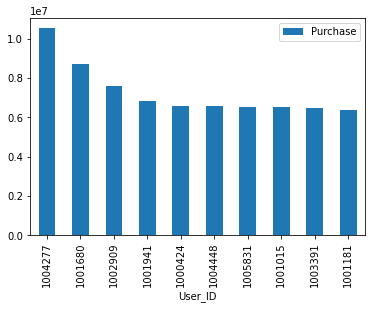

In [88]:
x = b.head(10)
x.plot.bar()

UserId 1004277 should be given discount voucher followed by others UserID as per graph 

## Product_Category_2 where Voucher should be Offered

                     Purchase
Product_Category_2           
2.0                 670303864
8.0                 658392656
16.0                445339722
15.0                392067176
14.0                391556939
4.0                 262295485
5.0                 236844899
6.0                 189417477
11.0                126366165
17.0                125495400
13.0                101975384
10.0                 47619084
9.0                  41428000
12.0                 38560412
3.0                  32402777
18.0                 25906260
7.0                   4309812


<AxesSubplot:xlabel='Product_Category_2'>

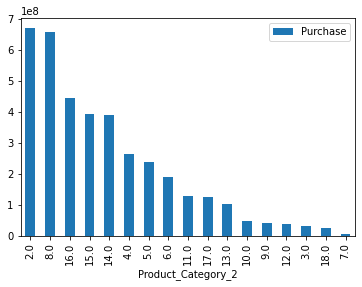

In [93]:
p2 = retail[['Product_Category_2','Purchase']]
p2 = p2.groupby(['Product_Category_2'])['Purchase'].sum()
c2 = p2.sort_values(ascending=False)
c2
p2 = pd.DataFrame(c2)
print(p2)
type(p2)
p2.plot.bar()

Under Product Category 2   2nd has highest Purchase

## Product_Category_3 where Voucher should be Offered

                     Purchase
Product_Category_3           
16.0                391040983
15.0                345662769
5.0                 201858094
17.0                196581588
14.0                185249212
8.0                 163619031
9.0                 120788622
12.0                 80583631
13.0                 71977563
6.0                  64520181
18.0                 50891137
10.0                 23311034
11.0                 21825045
4.0                  18364475
3.0                   8545034


<AxesSubplot:xlabel='Product_Category_3'>

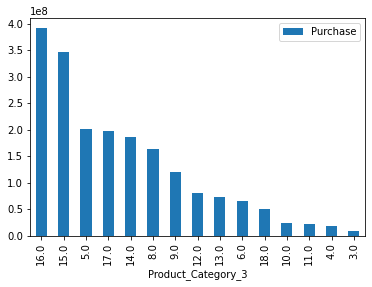

In [94]:
p3 = retail[['Product_Category_3','Purchase']]
p3 = p3.groupby(['Product_Category_3'])['Purchase'].sum()
c3 = p3.sort_values(ascending=False)
c3
p3 = pd.DataFrame(c3)

print(p3)
type(p3)
p3.plot.bar()

Under Product Category 3   16th has highest Purchase

## Total Purchase in Different Categories

In [95]:
sum3 = p3['Purchase'].sum()
sum3

1944818399

In [96]:
sum2 = p2['Purchase'].sum()
sum2

3790281512

In [97]:
sum1 = a['Purchase'].sum()
sum1

5094808637

From this we can make an inference that Product Category 1 has highest Purchase